### CSE-221710310060-SAHITHI.P

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston=load_boston()

In [3]:
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
boston_df['MDEV']=boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


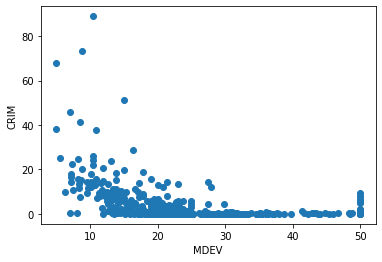

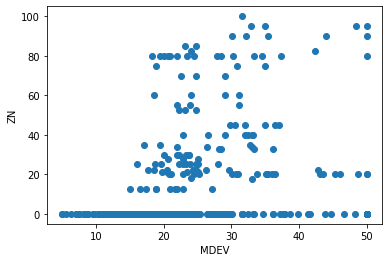

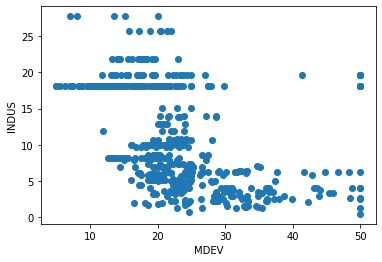

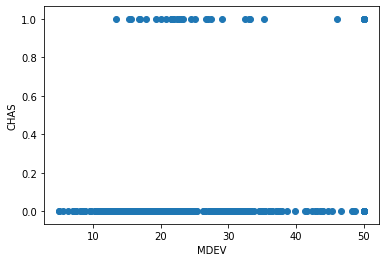

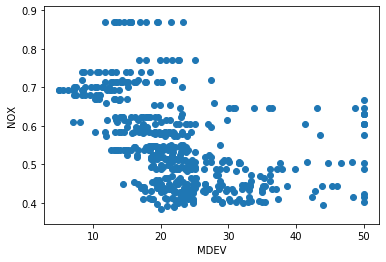

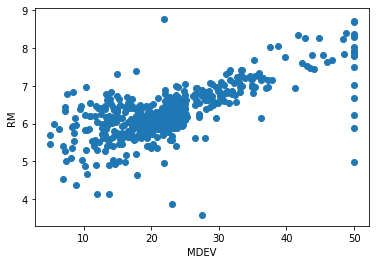

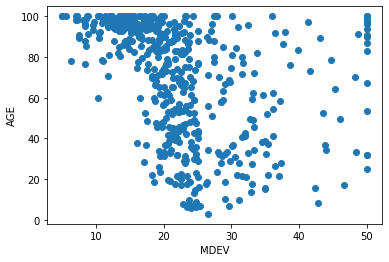

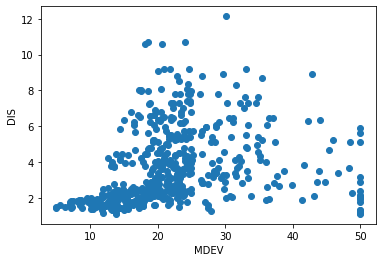

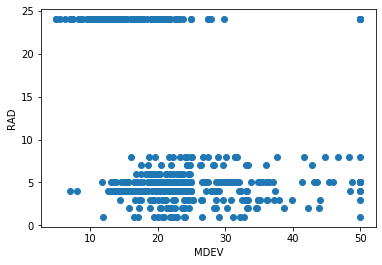

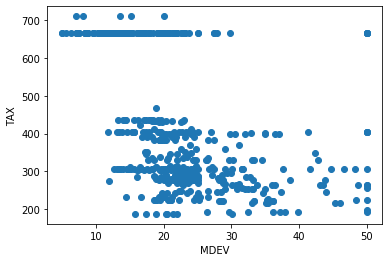

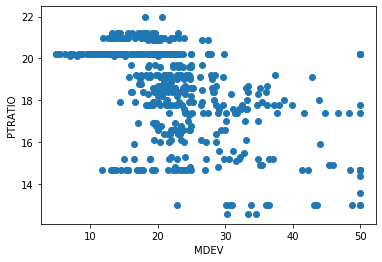

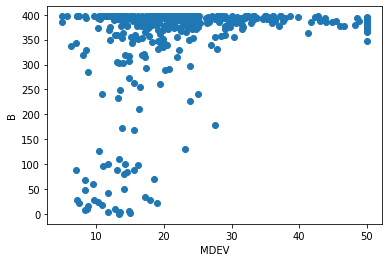

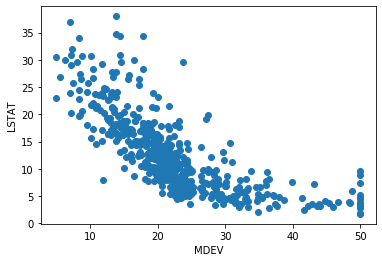

In [5]:
for i in boston.feature_names:
    plt.xlabel("MDEV")
    plt.ylabel(i)
    plt.scatter(boston_df['MDEV'],boston_df[i])
    plt.show()

In 1st Graph

CRIM column doesn't show much effect on MDV column

In 2nd Graph

ZN column doesn't show much effect on MDV column

In 3rd Graph

INDUS column doesn't show much effect on MDV column

In 4th Graph

CHAS column doesn't show much effect on MDV column

In 5th Graph 

NOX column doesn't show much effect on MDV column

In 6th Graph 

RM column shows stong positive effect on MDV column

In 7th Graph 

Age column shows slight negative much effect on MDV column

In 8th Graph 

DIS column shows slight positive much effect on MDV column

In 9th Graph 

RAD column doesn't show much effect on MDV column


In 10th Graph


TAX column doesn't show much effect on MDV column

In 11th Graph 

PTRATIO column doesn't show much effect on MDV column

In 12th Graph 

B column doesn't show much effect on MDV column

In 13th Graph

LSTAT column shows negative effect on MDV column

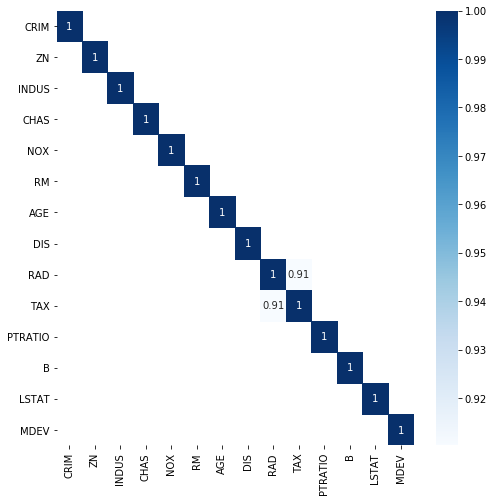

In [6]:
correlation = boston_df.corr()

cor = correlation[correlation>0.9]
plt.figure(figsize=(8,8))
sns.heatmap(cor, cmap='Blues', annot=True)

Only TAX and RAD columns have correlation of 0.91.
so,drop RAD Column

In [8]:
x=boston_df.drop(['MDEV','RAD'],axis=1)
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,6.48


In [10]:
y=boston_df[['MDEV']]
y

,MDEV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [12]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(404, 12)
(404, 1)
(102, 12)
(102, 1)


In [13]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
y_pred=lr.predict(x_test)

In [15]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import math

In [16]:
print("r2_score:",r2_score(y_test,y_pred))
print("adjusted_r2_score:",1- (1-r2_score(y_test, y_pred))*(len(x_test)-1)/
                                  (len(x_test)-x_test.shape[1]-1))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",math.sqrt(mean_squared_error(y_test,y_pred)))

r2_score: 0.7789181825925776
adjusted_r2_score: 0.7491093982230375
MAE: 3.1373277967003435
MSE: 18.495634507817492
RMSE: 4.300655125421881
